<a href="https://colab.research.google.com/github/theouterlimitz/SDSS_Star_Classification/blob/main/01_Initial_Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np

# Load the dataset
# Make sure the filename matches the one you downloaded
try:
    df = pd.read_csv('star_classification.csv')
    print("Dataset loaded successfully!")

    # --- Initial Inspection ---
    print("\nFirst 5 rows of the dataset:")
    print(df.head())

    print("\nDataset Info (columns, data types, non-null counts):")
    df.info()

    print("\nDescriptive Statistics (for numeric columns):")
    print(df.describe())

    print("\nMissing values per column:")
    print(df.isnull().sum())

except FileNotFoundError:
    print("ERROR: CSV file not found. Please make sure you have uploaded it to this Colab session and the filename is correct.")

Dataset loaded successfully!

First 5 rows of the dataset:
         obj_ID       alpha      delta         u         g         r  \
0  1.237661e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
1  1.237665e+18  144.826101  31.274185  24.77759  22.83188  22.58444   
2  1.237661e+18  142.188790  35.582444  25.26307  22.66389  20.60976   
3  1.237663e+18  338.741038  -0.402828  22.13682  23.77656  21.61162   
4  1.237680e+18  345.282593  21.183866  19.43718  17.58028  16.49747   

          i         z  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  \
0  19.16573  18.79371    3606       301        2        79  6.543777e+18   
1  21.16812  21.61427    4518       301        5       119  1.176014e+19   
2  19.34857  18.94827    3606       301        2       120  5.152200e+18   
3  20.50454  19.25010    4192       301        3       214  1.030107e+19   
4  15.97711  15.54461    8102       301        3       137  6.891865e+18   

    class  redshift  plate    MJD  fiber_ID  
0  GA

--- Starting Data Cleaning ---
Original number of rows: 100000
Number of rows after dropping errors: 99999

Dropped identifier columns. Final dataset columns:
['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'cam_col', 'class', 'redshift']

Final dataset shape: (99999, 10)

--- Starting Initial EDA ---


<ipython-input-13-762883868>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=df, palette='viridis', order=df['class'].value_counts().index)


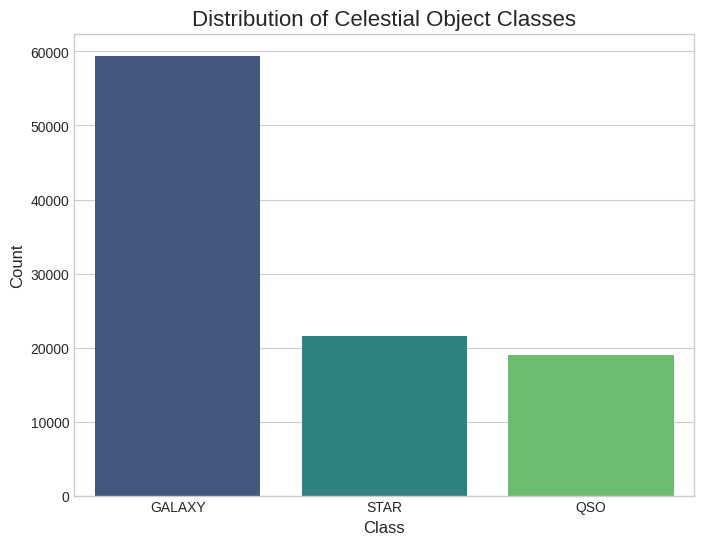

<ipython-input-13-762883868>:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y='redshift', data=df, palette='plasma')


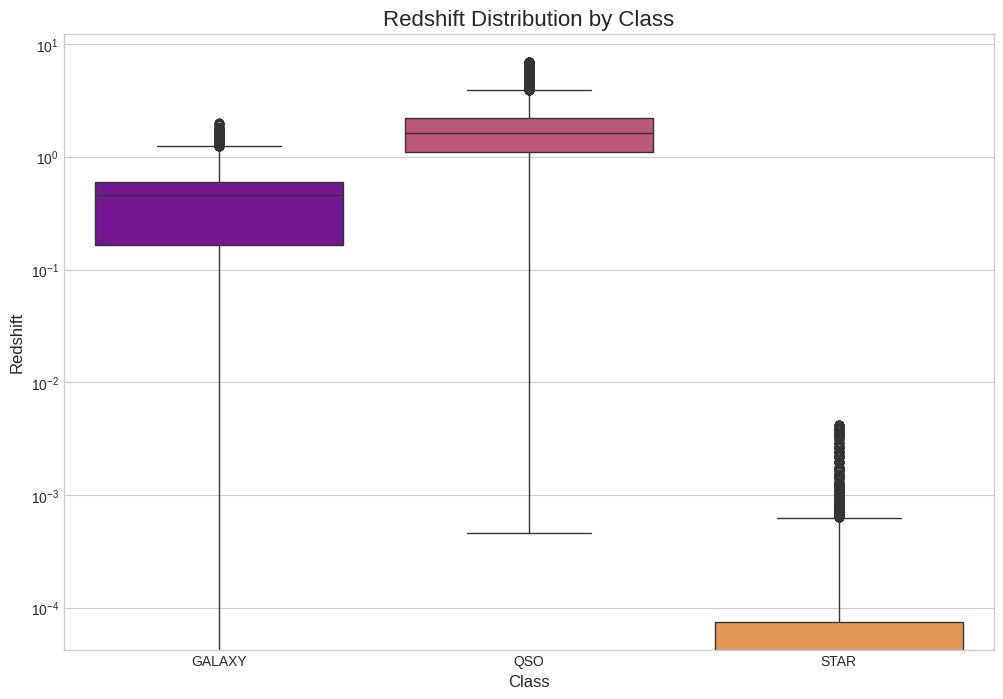

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Assume 'df' is your loaded DataFrame ---
# df = pd.read_csv('star_classification.csv')

# ===================================================================
# --- Step 1: Data Cleaning & Preprocessing ---
# ===================================================================
print("--- Starting Data Cleaning ---")

# First, handle the -9999 error values in the 'u', 'g', and 'z' columns
# We will replace them with NaN (Not a Number) to mark them as missing.
df[['u', 'g', 'z']] = df[['u', 'g', 'z']].replace(-9999, np.nan)

# Now, we can see if any rows have these new NaN values and decide how to handle them.
# Given the dataset size, dropping the few rows with errors is the cleanest approach.
print(f"Original number of rows: {len(df)}")
df.dropna(inplace=True)
print(f"Number of rows after dropping errors: {len(df)}")


# Next, drop the identifier columns that are not useful for prediction.
# 'rerun_ID' is a constant value and has no predictive power.
ids_to_drop = ['obj_ID', 'spec_obj_ID', 'run_ID', 'rerun_ID', 'field_ID', 'plate', 'MJD', 'fiber_ID']
df.drop(columns=ids_to_drop, inplace=True)

print("\nDropped identifier columns. Final dataset columns:")
print(df.columns.tolist())
print(f"\nFinal dataset shape: {df.shape}")


# ===================================================================
# --- Step 2: Initial Exploratory Data Analysis (EDA) ---
# ===================================================================
print("\n--- Starting Initial EDA ---")

# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')

# Insight 1: How balanced are our classes?
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=df, palette='viridis', order=df['class'].value_counts().index)
plt.title('Distribution of Celestial Object Classes', fontsize=16)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# Insight 2: How does a key feature like 'redshift' differ between classes?
# A box plot is great for this.
plt.figure(figsize=(12, 8))
sns.boxplot(x='class', y='redshift', data=df, palette='plasma')
plt.title('Redshift Distribution by Class', fontsize=16)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Redshift', fontsize=12)
# The redshift for quasars (QSO) can be very high, so a log scale on the y-axis can help with visualization.
plt.yscale('log')
plt.show()




In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# --- Assume 'df' is your cleaned DataFrame from the previous step ---
# If you are in a new session, you might need to re-run the previous script
# or load a saved, cleaned version of the data.

# ===================================================================
# --- Step 3: Data Preparation for Machine Learning ---
# ===================================================================
print("--- Preparing Data for Machine Learning ---")

# 1. Separate features (X) and target (y)
X = df.drop(columns=['class']) # All columns except our target
y = df['class']               # Just the target column

# 2. Encode the target variable
# Machine learning models need numbers, not text labels.
# LabelEncoder converts 'GALAXY'->0, 'QSO'->1, 'STAR'->2 (or similar)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
print("Target labels encoded successfully.")
# We can see the mapping:
print(f"Class mapping: {dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))}")


# 3. Split the data into training and testing sets
# We use 'stratify=y_encoded' because our classes are imbalanced. This ensures that
# the training and testing sets have the same proportion of each class as the original dataset.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y_encoded,
    test_size=0.2,    # Use 20% of the data for testing
    random_state=42,  # For reproducibility
    stratify=y_encoded
)
print(f"\nData split into training and testing sets.")
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")


# 4. Scale the features
# We scale the data AFTER splitting to prevent data leakage from the test set.
scaler = StandardScaler()

# Fit the scaler ONLY on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the scaler that was fit on the training data
X_test_scaled = scaler.transform(X_test)

print("\nFeatures scaled successfully.")
print("\nData is now fully prepared for model training!")

--- Preparing Data for Machine Learning ---
Target labels encoded successfully.
Class mapping: {'GALAXY': np.int64(0), 'QSO': np.int64(1), 'STAR': np.int64(2)}

Data split into training and testing sets.
Shape of X_train: (79999, 9)
Shape of X_test: (20000, 9)

Features scaled successfully.

Data is now fully prepared for model training!


--- Training Random Forest Classifier ---
Model training complete.

--- Evaluating Model Performance ---
Accuracy Score: 0.9795

Classification Report:
              precision    recall  f1-score   support

      GALAXY       0.98      0.99      0.98     11889
         QSO       0.97      0.93      0.95      3792
        STAR       1.00      1.00      1.00      4319

    accuracy                           0.98     20000
   macro avg       0.98      0.97      0.98     20000
weighted avg       0.98      0.98      0.98     20000


Confusion Matrix:


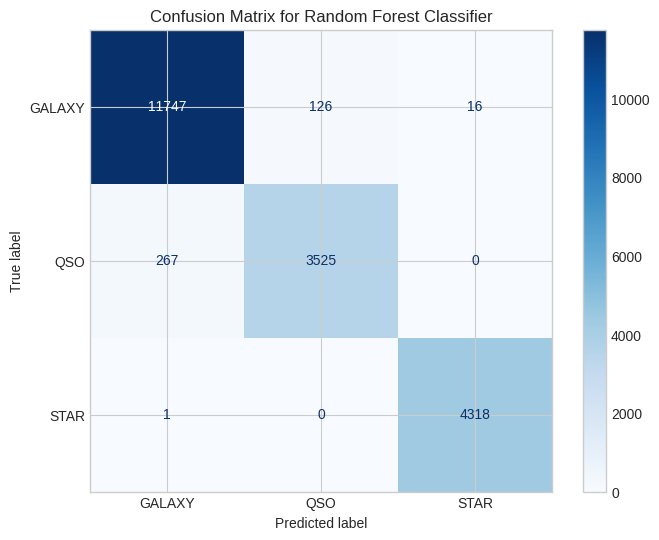


--- Analyzing Feature Importance ---


<ipython-input-4-1934108684>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_df.values, y=feature_importance_df.index, palette='mako')


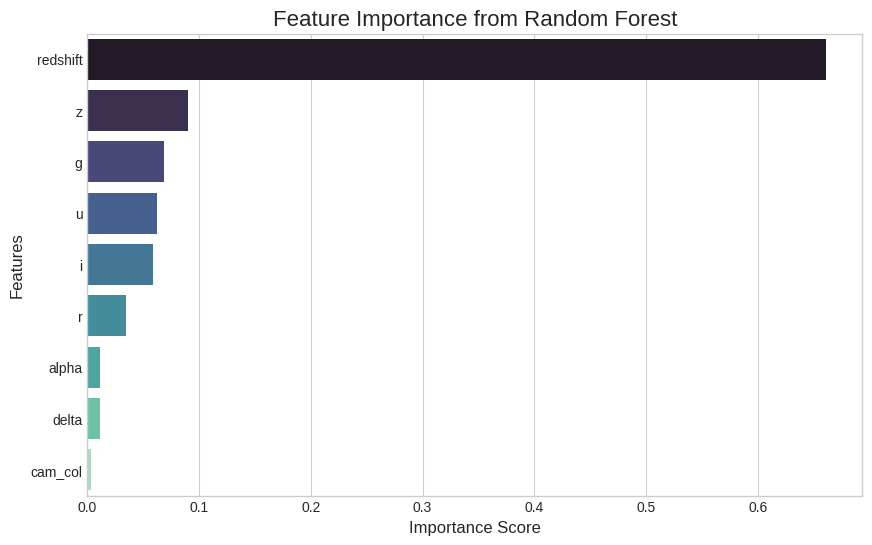

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Assume these variables are loaded in your notebook's memory ---
# X_train_scaled, X_test_scaled, y_train, y_test
# X_train (for feature names), label_encoder

# ===================================================================
# --- Step 4: Train and Evaluate a Baseline Model (Random Forest) ---
# ===================================================================
print("--- Training Random Forest Classifier ---")

# 1. Initialize and Train the Model
# n_estimators=100 means it will build 100 decision trees.
# random_state=42 ensures we get the same results every time we run it.
rfc = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1) # n_jobs=-1 uses all available CPU cores

# Train the model on the scaled training data
rfc.fit(X_train_scaled, y_train)
print("Model training complete.")


# 2. Make Predictions on the Test Set
print("\n--- Evaluating Model Performance ---")
y_pred = rfc.predict(X_test_scaled)


# 3. Evaluate the Model's Performance
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.4f}")

# Classification Report
# This gives us precision, recall, and f1-score for each class, which is crucial for imbalanced datasets.
print("\nClassification Report:")
# We use label_encoder.classes_ to show the original names ('GALAXY', 'QSO', 'STAR')
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion Matrix
print("\nConfusion Matrix:")
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(rfc, X_test_scaled, y_test,
                                      display_labels=label_encoder.classes_,
                                      cmap='Blues',
                                      ax=ax)
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()


# ===================================================================
# --- Step 5: Analyze Feature Importance ---
# ===================================================================
print("\n--- Analyzing Feature Importance ---")

# Get feature importances from the trained model
importances = rfc.feature_importances_
# Create a pandas Series for easier plotting
feature_importance_df = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_df.values, y=feature_importance_df.index, palette='mako')
plt.title('Feature Importance from Random Forest', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.show()

In [15]:
# Save the cleaned dataframe to a pickle file for use in the modeling notebook
df.to_pickle('cleaned_sdss_data.pkl')
print("\nCleaned data saved to 'cleaned_sdss_data.pkl'")


Cleaned data saved to 'cleaned_sdss_data.pkl'
